In [1]:
import pygmt
import pandas as pd

In [13]:
file = '/Volumes/home/Research/DataBase/03_PlateMotion/velocity_NNR_fromGSRM2014.dat'#'/Volumes/home/Research/DataBase/03_PlateMotion/velocity_NNR_fromGSRM.dat'
filename = 'APM_GSRM2014_NNR_Large'  
dv = 0.015 # 0.015 for mm, 0.15 forcm
plate = '/Volumes/home/Research/DataBase/03_PlateMotion/GSRM2014_PlateModel.txt'
# plate='PB2002_boundaries.dig.txt'
# plate = '/Volumes/home/Research/DataBase/03_PlateMotion/morvelNNR_PlateModel.txt' ## or 'PB2002_boundaries.dig.txt'
df = pd.read_csv(file, sep='\s+',names=['lon','lat','Evel','Nvel','sig_vlon','sig_vlat','a','b','c'])#,'sig_vlon','sig_vlat','a','b','c'])
cptfile = '/Volumes/home/Research/Python'


In [8]:
!open .

In [9]:
df

,lon,lat,Evel,Nvel,sig_vlon,sig_vlat,a,b,c
0,238.327,36.914,-37.852,16.404,1.149,1.315,0.037,04AL,Shen_JGR_2011
1,238.250,36.763,-38.182,19.883,0.829,0.866,0.016,0513,Shen_JGR_2011
2,239.059,36.279,-37.555,19.266,1.297,1.680,-0.009,05TH,Shen_JGR_2011
3,238.925,36.488,-24.792,3.411,1.308,1.744,0.018,05VH,Shen_JGR_2011
4,238.730,36.696,-28.229,3.439,1.506,1.711,0.055,05WF,Shen_JGR_2011
...,...,...,...,...,...,...,...,...,...
22506,275.703,33.380,-12.871,0.493,0.300,0.304,0.000,ZTL4,UNR
22507,242.510,37.558,-15.572,-10.286,0.338,0.117,0.000,ZUMA,UNR
22508,267.319,44.291,-15.340,-3.213,0.363,0.413,0.000,ZUMB,UNR
22509,36.758,55.699,23.361,13.159,0.334,0.454,0.000,ZWE0,UNR


In [3]:
pygmt.config(FONT_ANNOT_PRIMARY = '10p,Times-Roman',
            FONT_LABEL = '14p,Times-Roman',
            MAP_LABEL_OFFSET = '4p',
            MAP_TICK_LENGTH_PRIMARY = '5p',
            PROJ_LENGTH_UNIT = 'c',
            MAP_ANNOT_OFFSET_PRIMARY = '5p',
            MAP_ANNOT_OFFSET_SECONDARY = '5p',
            MAP_FRAME_TYPE = 'fancy',
            MAP_FRAME_WIDTH = 'auto',
            FORMAT_GEO_MAP = 'D',
            PS_CHAR_ENCODING = 'Standard+',
            MAP_FRAME_PEN = '2p,black')

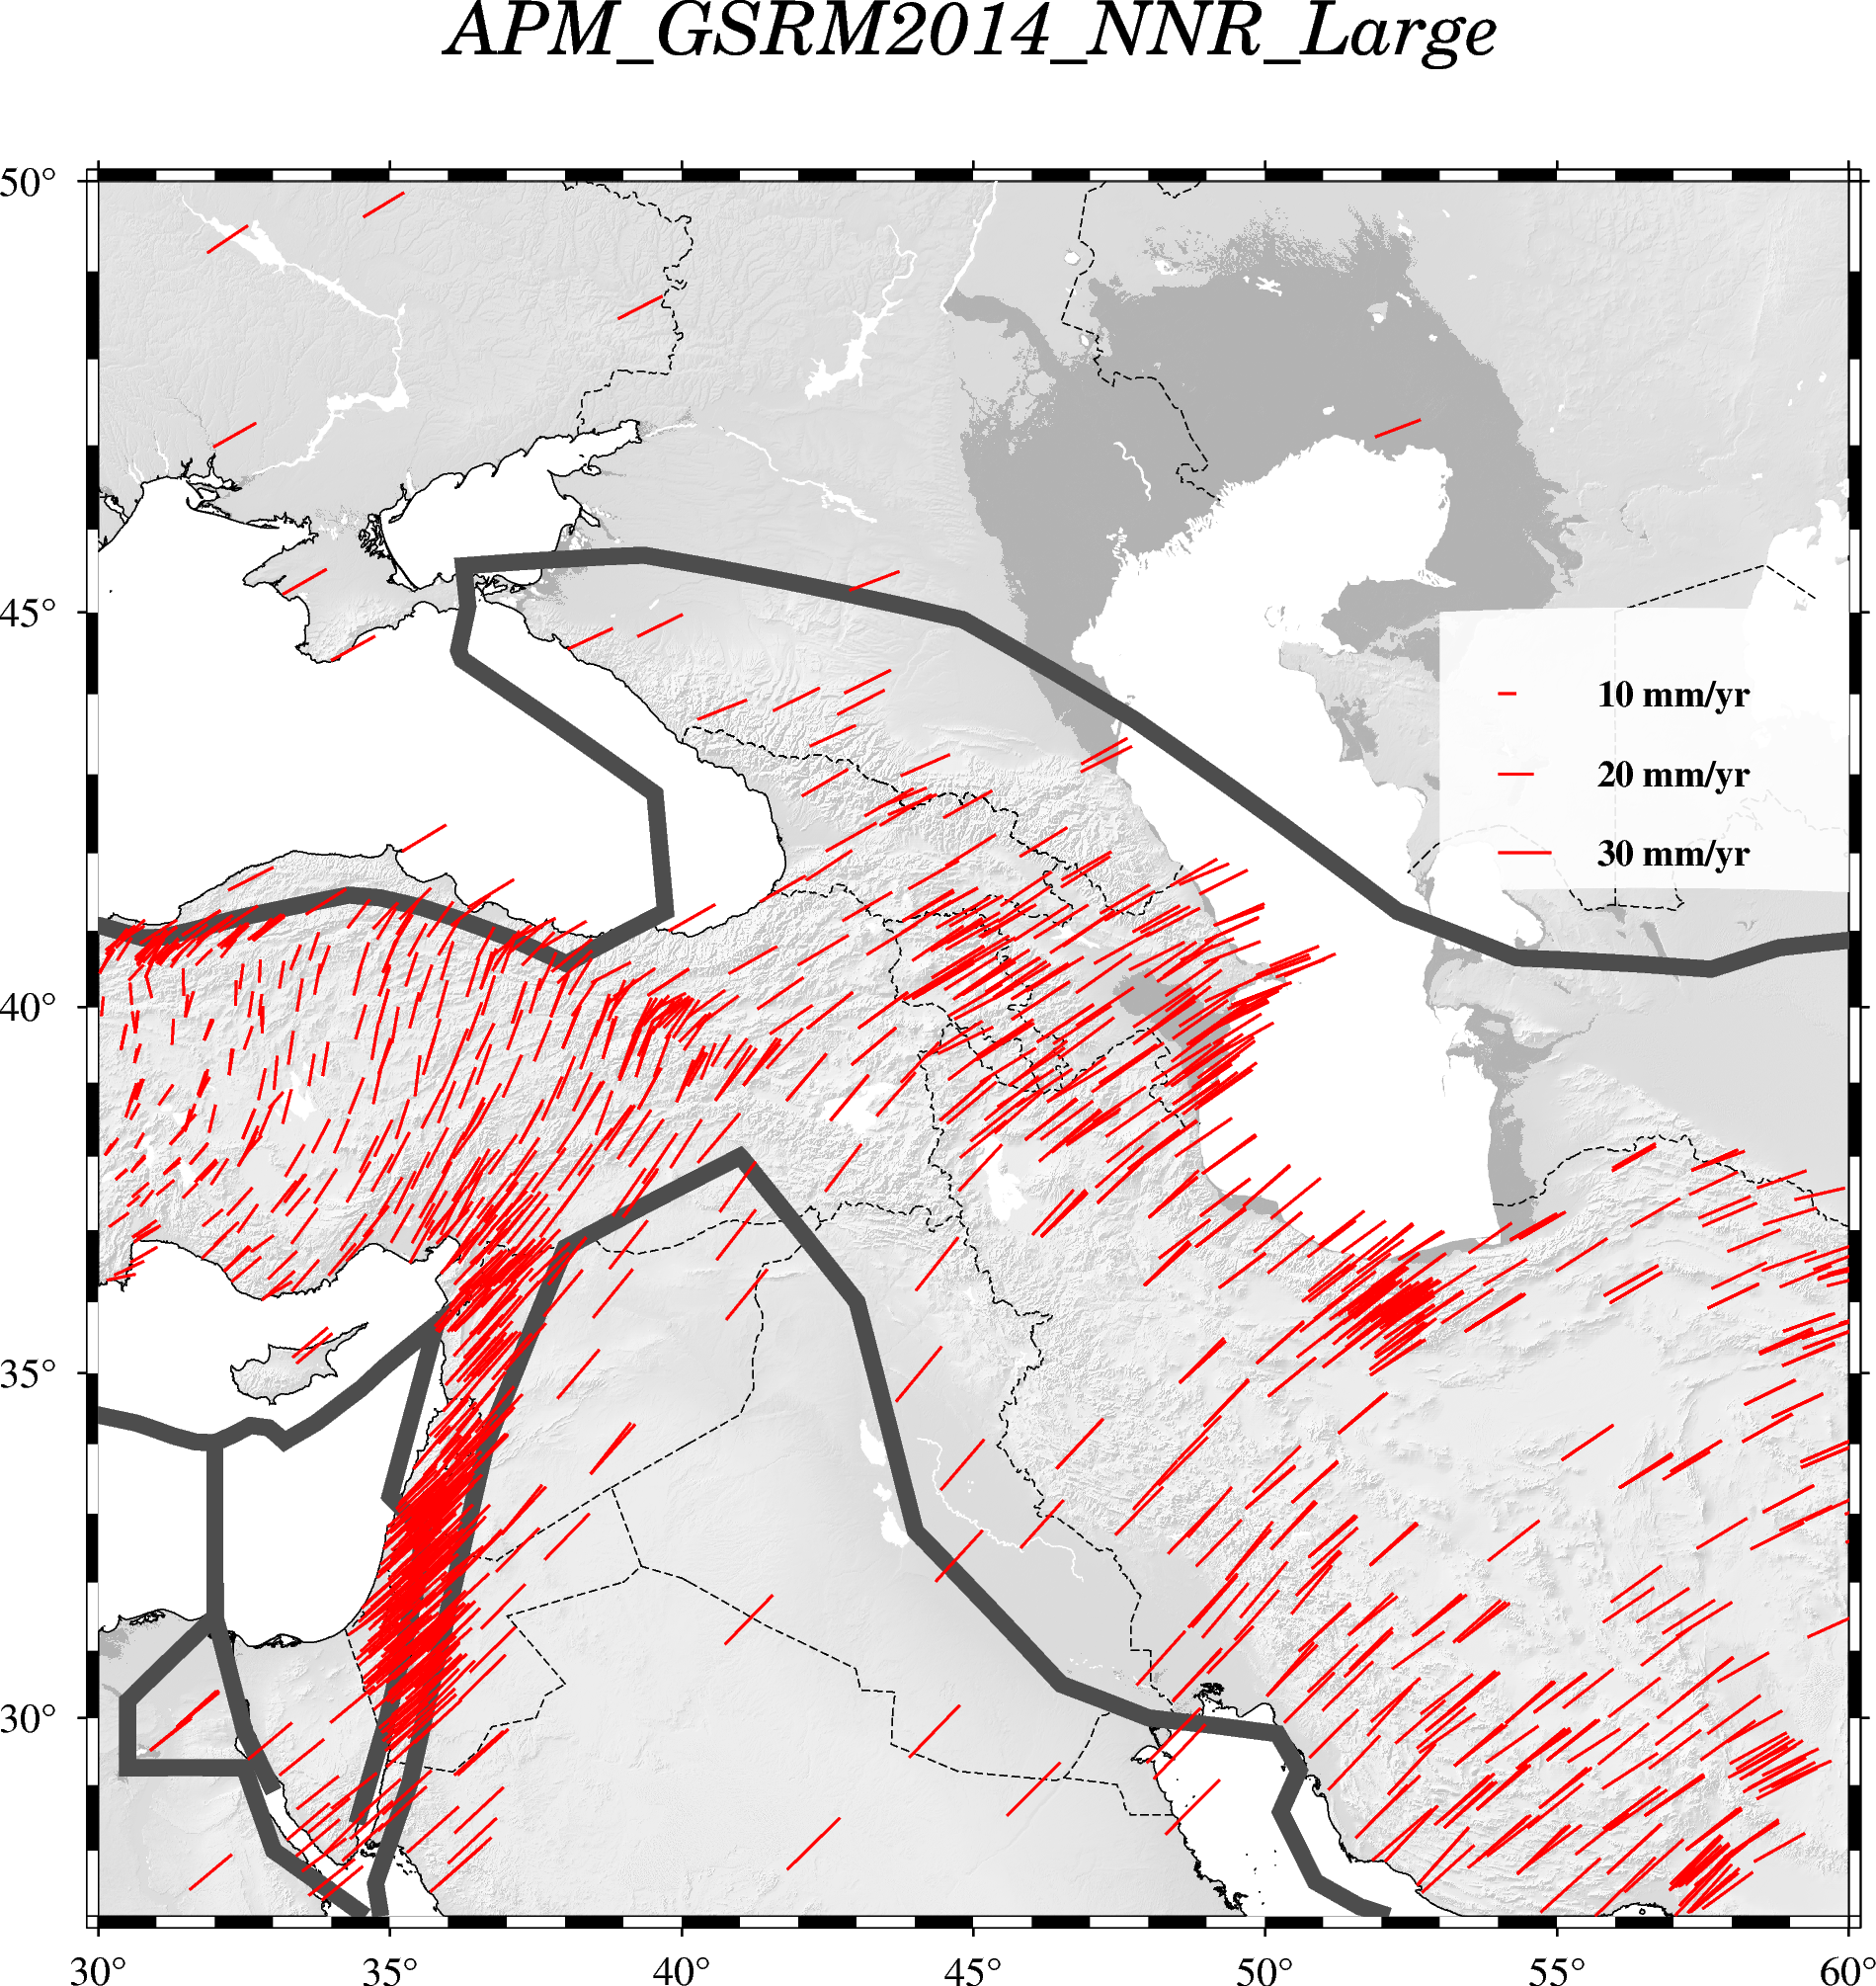

In [14]:
region = [30,60,27,50]# my study[30,60,27,45]
figmap = pygmt.Figure()
figmap.basemap(region=region, projection="M15c", frame = ['x5f1', 'y5f1', f'nSeW+t{filename}'])
figmap.grdimage('@earth_relief_30s',region =region, cmap=f"{cptfile}/eleva.cpt",monochrome=True, shading=True, transparency=70)
figmap.coast(resolution = 'h', shorelines ='1/thinnest,black', water='white', borders = '1/0.25p,--')
figmap.plot(plate, pen='4p,grey30')

figmap.velo(data=df,pen="0.6p,red",vector="0.1c+p1p+e+gred",spec=f"n{dv}")

db = pd.DataFrame(data={
        "x": [54, 54, 54],
        "y": [44, 43, 42],
        "east_velocity": [10, 20, 30],
        "north_velocity": [0, 0, 0]} )

figmap.plot(data = 'box.txt', color = 'white@10')
figmap.velo(data=db, pen="0.6p,red",vector="0.1c+p1p+e+gred",spec=f"n0.015",no_clip=True)
figmap.text(x=57,y=44,text='10 mm/yr', font='9p,5')
figmap.text(x=57,y=43,text='20 mm/yr', font='9p,5')
figmap.text(x=57,y=42,text='30 mm/yr', font='9p,5')
figmap.savefig(f'{filename}.png',dpi=300)
figmap.savefig(f'{filename}.pdf')
figmap.show()

In [72]:
df

,lon,lat,Evel,Nvel,sig_vlon,sig_vlat,a,b,c
0,238.327,36.914,-46.176,15.613,1.149,1.315,0.037,04AL,Shen_JGR_2011
1,238.250,36.763,-46.560,19.108,0.829,0.866,0.016,0513,Shen_JGR_2011
2,239.059,36.279,-46.116,18.327,1.297,1.680,-0.009,05TH,Shen_JGR_2011
3,238.925,36.488,-33.276,2.499,1.308,1.744,0.018,05VH,Shen_JGR_2011
4,238.730,36.696,-36.636,2.567,1.506,1.711,0.055,05WF,Shen_JGR_2011
...,...,...,...,...,...,...,...,...,...
22506,275.703,33.380,-24.043,-7.208,0.300,0.304,0.000,ZTL4,UNR
22507,242.510,37.558,-23.716,-11.924,0.338,0.117,0.000,ZUMA,UNR
22508,267.319,44.291,-22.209,-9.551,0.363,0.413,0.000,ZUMB,UNR
22509,36.758,55.699,3.371,9.611,0.334,0.454,0.000,ZWE0,UNR


In [14]:
!open .